<a href="https://colab.research.google.com/github/MarchellStudentGit/Machine-Learning/blob/main/Clustering_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering DBSCAN

In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv("/content/en_climate_summaries_All_09-2019.csv")
dataset.head()

,Long,Lat,Stn_Name,Clim_ID,Prov,Tm,DwTm,D,Tx,DwTx,...,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD
0,-123.742,48.935,CHEMAINUS,1011500,BC,15.8,0.0,NaN,26.5,0.0,...,87.9,0.0,NaN,0.0,13.0,NaN,NaN,NaN,74.5,8.6
1,-123.226,48.425,DISCOVERY ISLAND,1012475,BC,13.6,1.0,NaN,20.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.6,0.0
2,-123.439,48.432,ESQUIMALT HARBOUR,1012710,BC,14.1,1.0,NaN,23.2,1.0,...,67.2,1.0,NaN,NaN,8.0,NaN,NaN,NaN,113.0,0.0
3,-123.573,48.985,GALIANO NORTH,10130MN,BC,14.5,15.0,NaN,23.0,15.0,...,63.1,15.0,NaN,0.0,9.0,NaN,NaN,NaN,53.8,0.8
4,-123.530,48.575,MALAHAT,1014820,BC,14.4,1.0,NaN,25.7,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.2,8.0


In [ ]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalle

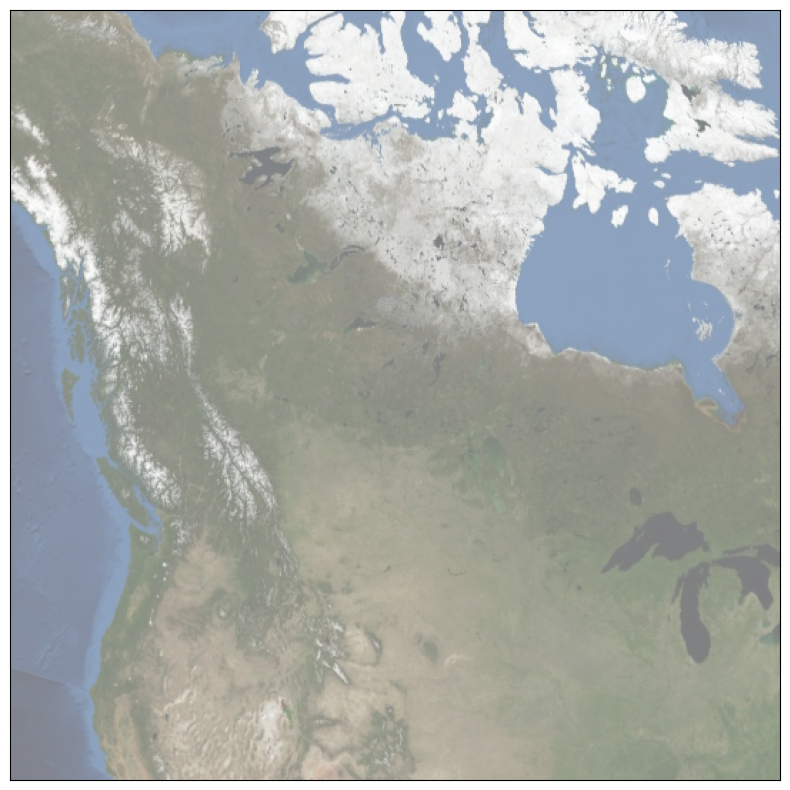

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(14,10))
m = Basemap(projection="lcc", lat_0=56, lon_0=-106, resolution=None, width=4E6, height=4E6)
m.bluemarble(alpha=0.5)
plt.show(m)

In [12]:
dataset.dropna(subset=['Tm', 'Tx', 'Tn'], inplace=True)
print(dataset.shape)

(1203, 25)


Tampilkan visualisasi stasiun cuaca ke dalam map

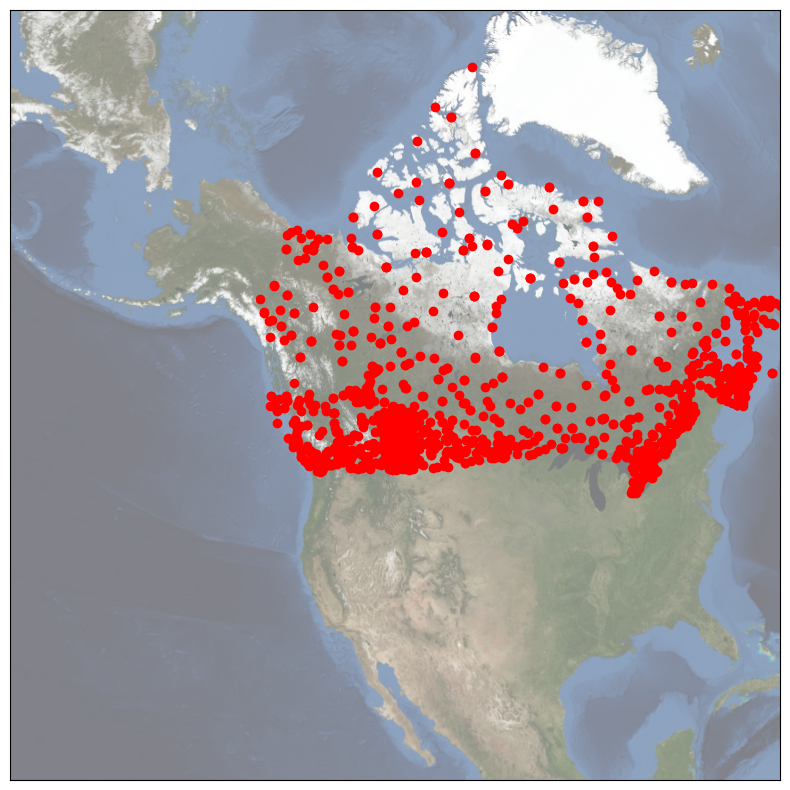

In [22]:
fig = plt.figure(figsize=(10,10))
m = Basemap(projection="lcc", lat_0=56, lon_0=-113, resolution=None, width=8E6, height=8E6)
m.bluemarble(alpha=0.5, scale=0.8)

# baca dari dataset
xs, ys = m(np.asarray(dataset.Long), np.asarray(dataset.Lat))
dataset['xm'] = xs.tolist()
dataset['ym'] = ys.tolist()
dataset.head()
plt.plot(xs, ys, 'o', color='red')
plt.show()

In [23]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [25]:
dx = dataset[["Tm", "Tx", "Tn", "xm", "ym"]]
x = StandardScaler().fit_transform(dx)

db = DBSCAN(eps=0.3, min_samples=10).fit(x)
labels = db.labels_
dataset["Clus_Db"]=labels
dataset[["xm", "ym", "Clus_Db"]]

jmlclus = len(set(labels)) - (1 if -1 in labels else 0)
jmlclus

6

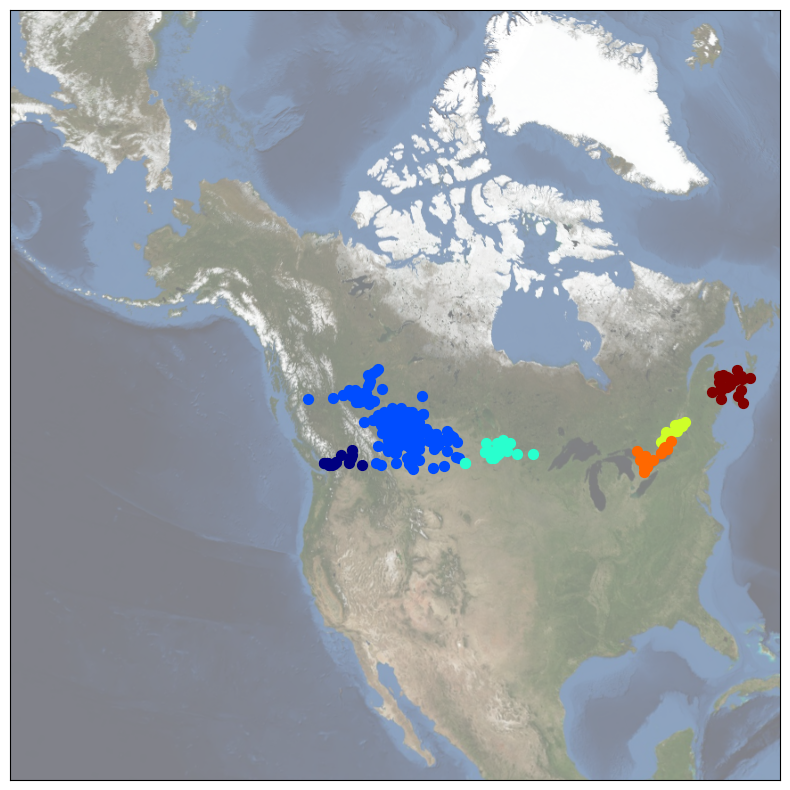

In [29]:
fig = plt.figure(figsize=(10,10))
m = Basemap(projection="lcc", lat_0=56, lon_0=-113, resolution=None, width=8E6, height=8E6)
m.bluemarble(alpha=0.5, scale=0.8)

# memvisualkan ke dalam map
colors = plt.get_cmap('jet')(np.linspace(0, 1, jmlclus))
for clust in range(0, jmlclus):
  c = (([0.4,0.4,0.4]) if clust == -1 else colors[int(clust)])
  clust_set = dataset[dataset.Clus_Db == clust]
  m.scatter(clust_set.xm, clust_set.ym, color=c, s=50)
plt.show()